# Regressão

Nesta análise, foi carregado o conjunto de dados da quailidade do vinho tinto, escolhemos a variante vermelho (“winequality-red.csv”). Primeiramente, foi verificado se havia valores faltantes, assim não foram encontrados nenhum valor faltante e, portanto, não foi necessário aplicar imputação. Em seguida, treinamos um modelo de regressão linear múltipla com divisão de 80 % dos dados para treino e 20 % para teste. O desempenho do modelo foi avaliado pelo RMSE, que ficou em 0,625 ponto, e pelo coeficiente de determinação R², que explicou 40,3 % da variância da qualidade. Para entender quais atributos mais influenciam a nota, calculamos a correlação de cada variável com “quality” e identificamos que o teor alcoólico apresenta a maior correlação positiva, seguido de “sulphates” e “citric acid”, enquanto “volatile acidity” e “density” têm correlação negativa moderada. Concluímos que, embora a qualidade seja um conceito subjetivo e difícil de coorelacionar com dados numéricos, ainda é possivel perceber que algumas caracteristicas influenciam mais a nota. 



In [3]:
%pip install matplotlib
%pip install scikit-learn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Danilo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Valores faltantes por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Após preenchimento, valores faltantes:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

RMSE: 0.625
R²:   0.403


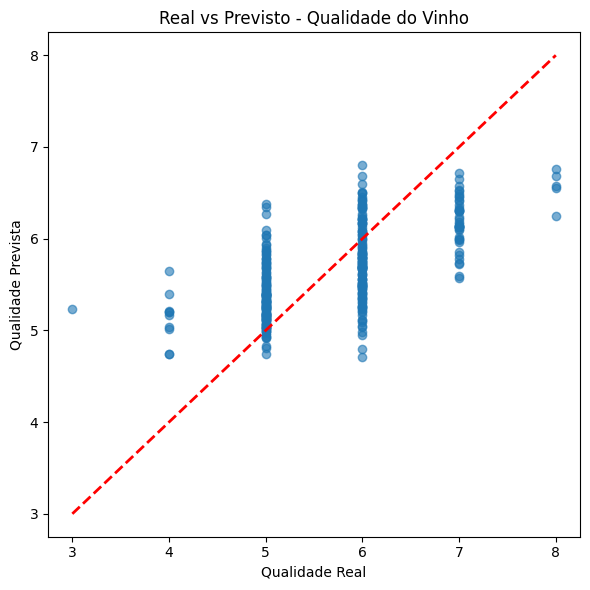

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1) Carregar o dataset
path = 'data/winequality-red.csv'
df = pd.read_csv(path, sep=';')

# 2) Verificação de valores faltantes
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# 3) Tratamento de valores faltantes
#    Aqui usamos a mediana de cada coluna para preencher
df.fillna(df.median(), inplace=True)

# Conferir novamente
print("\nApós preenchimento, valores faltantes:")
print(df.isnull().sum())

# 4) Preparar X e y
X = df.drop('quality', axis=1)
y = df['quality']

# 5) Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 6) Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# 7) Fazer previsões e avaliar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# 8) Gráfico Real vs Previsto
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Qualidade Real")
plt.ylabel("Qualidade Prevista")
plt.title("Real vs Previsto - Qualidade do Vinho")
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# 1) Carrega o dataset
df = pd.read_csv('data/winequality-red.csv', sep=';')

# 2) Calcula correlação de cada coluna com 'quality'
corr_quality = df.corr()['quality'].drop('quality')
corr_quality = corr_quality.reindex(corr_quality.abs().sort_values(ascending=False).index)

print(corr_quality)


alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64
